INTRODUCTION
"In the banking for the identification of Credit Risk is nessary to decrease financial losses. This project on predicting whether a loan applicant is likely to default or not based on their profile. Using the Loan Prediction Dataset, we will perform data cleaning, handle missing values, and build a Classification Model like LogisticRegression to automate the decision-making process for loan approvals.

PROBLEM STATEMENT
"The aim of this project is to build a model that can predict, based on a loan applicant's history, whether they will repay the loan or not, in order to minimize the bank's financial loss."

IMPORT ALL IMPORTENT LIBRERIES

In [1]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , r2_score

Load and show the data

In [2]:
# Loading the dataset
df=pd.read_csv("Loan_Predication.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


To Get Columns Informations 

In [3]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


Removing Loan_ID and Dependents form data frame

In [4]:
# Dropping unnecessary columns
df.drop('Loan_ID', axis=1, inplace=True)
df.drop('Dependents', axis=1, inplace=True)
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Checking Empty Data 

In [5]:
# Checking for missing values
df.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Filling Empty Data by fill funtion

In [6]:
# Handling missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)



C:\Users\dell\AppData\Local\Temp\ipykernel_936\1111956994.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_936\1111956994.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

Convert Categerical data To Numbers

In [7]:
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
cols = ['Gender', 'Married', 'Education','Property_Area', 'Self_Employed', 'Loan_Status']

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


DATA VISUALIZATIONS

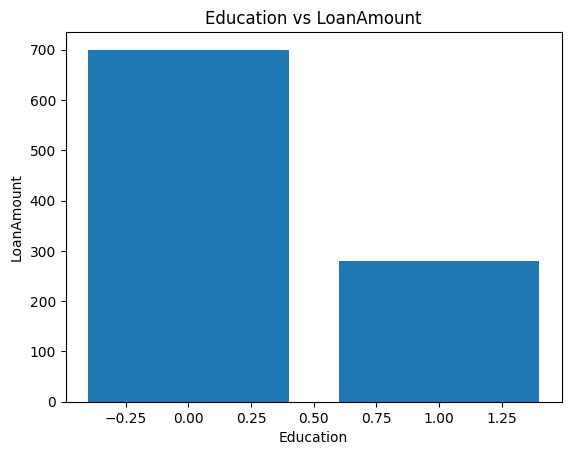

In [8]:
# Visualization: Education vs LoanAmount
plt.bar(df['Education'],df['LoanAmount'])

# Adding labels , title and showing the plot
plt.xlabel("Education")
plt.ylabel("LoanAmount")
plt.title("Education vs LoanAmount")
plt.show()

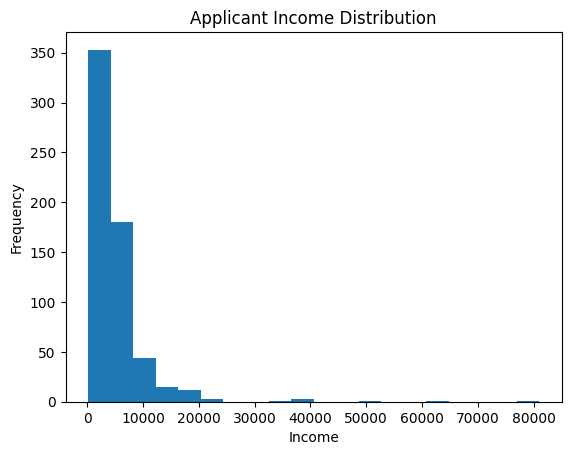

In [9]:
# Visualization: Applicant Income Distribution
plt.hist(df['ApplicantIncome'], bins=20)

# Adding labels , title and showing the plot
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Applicant Income Distribution")
plt.show()


Features & Target Split

In [10]:
# Splitting the data into features and target variable
X = df.drop('Loan_Status', axis=1)

# Target variable
y = df['Loan_Status']

Train-Test Split

In [11]:
# importing train_test_split
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

MODEL TRAINING 

In [12]:
# Importing and training the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Creating and fitting the model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


PREDICTION AND ACCURACY_SCORE

In [13]:
# Making predictions
y_pred = model.predict(X_test)

# Importing accuracy_score
from sklearn.metrics import accuracy_score

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7886178861788617


CONFUSION MATRIX

In [14]:
#Importing confusion_matrix
from sklearn.metrics import confusion_matrix

# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[18 25]
 [ 1 79]]
